In [1]:
import os
import numpy as np
from tqdm.notebook import tqdm, trange

In [2]:
from goleta import data as D
from goleta import util as U

In [3]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
X_all = D.get_obs(cut='')

123396 observed galaxies


/home/chhahn/projects/goleta/src/goleta/data.py:166: RuntimeWarning: divide by zero encountered in power
  Xs = np.concatenate([absmag_nsa[cuts], ivar_absmag_nsa[cuts]**-0.5], axis=1)


In [5]:
X_obs = D.get_obs(cut='v0')

14736 observed galaxies


/home/chhahn/projects/goleta/src/goleta/data.py:151: RuntimeWarning: divide by zero encountered in power
  (ivar_absmag_nsa[:,-1]**-0.5 > 0.03) & (ivar_absmag_nsa[:,-1]**-0.5 < 0.04)))


In [12]:
_, x_test = D.get_data('all', 'omega', 'xobs', sim='tng', downsample=True)

In [7]:
igals = [4845, 8791, 6231, 3737, 8303]

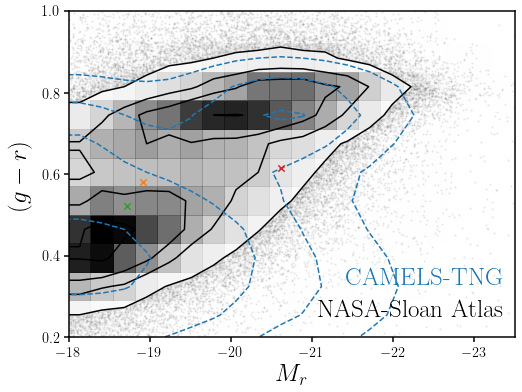

In [32]:
fig = plt.figure(figsize=(8,6))            
sub = fig.add_subplot(111)

# plot distribution of NASA-Sloan Atlas galaxies
DFM.hist2d(X_all[:,1], X_all[:,0] - X_all[:,1], range=[(-18., -23.5), (-0.2, 1.2)], ax=sub)

DFM.hist2d(x_test[:,1], x_test[:,0] - x_test[:,1], 
           range=[(-18., -23.5), (-0.2, 1.2)], 
           contour_kwargs={'linestyles':'dashed'}, smooth=True, #levels=[0.95], 
           plot_density=False, plot_datapoints=False, no_fill_contours=True, fill_contours=False, 
           color='C0', ax=sub)

for _i, ii in enumerate(igals[:3]): 
    sub.scatter([X_obs[ii,1]], [X_obs[ii,0] - X_obs[ii,1]], c='C%i' % (_i+1), marker='x', s=40, zorder=10)
sub.text(0.975, 0.05, 'NASA-Sloan Atlas', transform=sub.transAxes, fontsize=25, ha='right', va='bottom')
sub.text(0.975, 0.15, 'CAMELS-TNG', color='C0', transform=sub.transAxes, fontsize=25, ha='right', va='bottom')

sub.set_xlabel('$M_r$', fontsize=25)
sub.set_xlim(-18, -23.5)
sub.set_ylabel('$(g-r)$', labelpad=10, fontsize=25)
sub.set_ylim(0.2, 1.)    
sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.])
fig.savefig('../figs/nsa.pdf', bbox_inches='tight')